# Task 4.10 Coding Etiquette and Excel reporting PART2

## Table of contents
#### 1. Importing Libraries
#### 2. Importing Data
#### 3. Customer Profiling
#### 4. Visualizing the profiling variable
#### 5. Aggregating summary statistics
#### 6. Comparing the profiling variable by region and department
#### 7. Visualizing the comparison
#### 8. Additional visualizations for the final report
#### 9. Exporting the final data set


# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy

# 02. Importing Data

In [2]:
# Turn project folder path into a string

path = r'C:\Users\osoty\Desktop\CareerFoundry Data Analytics\Data Immersion\Achievement 4\02-23 Instacart Basket Analysis'

In [3]:
# Import the ords_prods_custm dataframe with only the high-activity customers 

df_2 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_high_activity_customers.pkl'))

In [4]:
# Check the output of the imported dataframe

df_2.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,product_name,aisle_id,...,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,Soda,77,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
1,2398795,1,2,3,7,15.0,False,196,Soda,77,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
2,473747,1,3,3,12,21.0,False,196,Soda,77,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
3,2254736,1,4,4,7,29.0,False,196,Soda,77,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity
4,431534,1,5,4,15,28.0,False,196,Soda,77,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity


In [5]:
# Check the size of the dataframe

df_2.shape

(30964564, 31)

In [6]:
# Import the secondary dataframe needed for this task, the departments dataframe 

df_departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [7]:
# Check the output of the departments dataframe

df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
# Rename the 'Unnamed:0' column

df_departments.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [9]:
# Check the name change

df_departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 03. Customer Profiling

## Q5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

## Analyzing Variables

### a) Income

In [10]:
# Check descriptive statistics for income

df_2['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

### The lowest income is 25.903 USD, while the highest income is 593.901 USD.

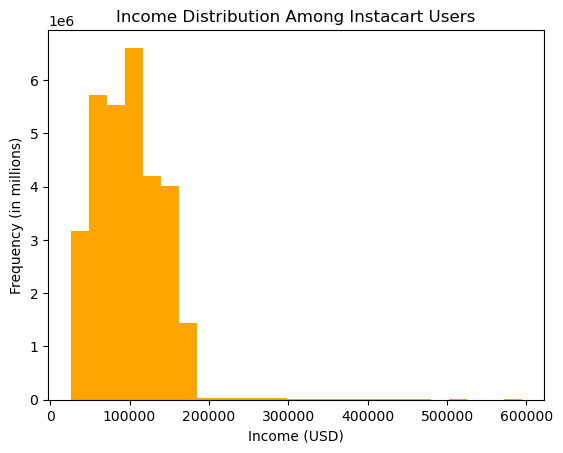

In [11]:
# Create a histogram of incomes to see the distribution

hist_income = df_2['income'].plot.hist(bins = 25, color = 'orange')

plt.xlabel("Income (USD)")
plt.ylabel("Frequency (in millions)")
plt.title("Income Distribution Among Instacart Users")
plt.show()

In [12]:
# Export the histogram

hist_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_customers_income.png'))

In [13]:
# Calculate the income percentiles

quartile_income = list(df_2['income'].quantile([0.25, 0.5, 0.75]))

In [14]:
# Check the output

quartile_income

[67292.0, 96765.0, 128102.0]

In [15]:
# Create an 'income_flag' column based on the quartiles

df_2.loc[df_2['income']< 70000, 'income_flag'] = 'Low'
df_2.loc[(df_2['income']>= 70000) & (df_2['income']< 120000), 'income_flag'] = 'Middle'
df_2.loc[df_2['income']>= 120000, 'income_flag'] = 'High'

In [16]:
# Check the frequencies for the 'income_flag' column

df_2['income_flag'].value_counts()

Middle    13264248
High       9179783
Low        8520533
Name: income_flag, dtype: int64

In [17]:
# Check the size of the dataframe 

df_2.shape

(30964564, 32)

### b) Age

In [18]:
# Check the descriptive statistics for age

df_2['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

### Result: There is a wide spread of ages with all customers being adults. The minimum age is 18 and the maximum age is 81 so it makes sense to group the customers into three age categories: 

#### 1.) Youth: 18 - 34
#### 2.) Middle age: 35 - 64
#### 3.) Senior: 65+



In [19]:
# Create the 'age category' column

df_2.loc[(df_2['age'] >= 18) & (df_2['age'] < 35), 'age_category'] = 'Youth'
df_2.loc[(df_2['age'] >= 35) & (df_2['age'] < 65), 'age_category'] = 'Middle age'
df_2.loc[df_2['age'] >= 65, 'age_category'] = 'Senior'


In [20]:
df_2['age_category'].value_counts()

Middle age    14526725
Youth          8242295
Senior         8195544
Name: age_category, dtype: int64

In [21]:
# Check the size of the dataframe

df_2.shape

(30964564, 33)

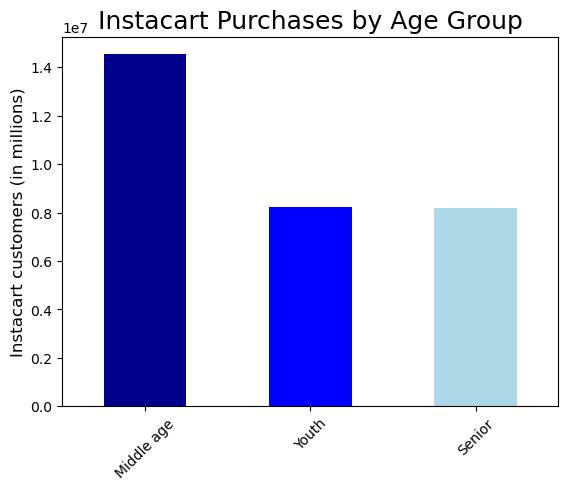

In [22]:
# Create a bar chart for the 'age_category' column

bar_age_category = df_2['age_category'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue'])
plt.title("Instacart Purchases by Age Group", fontsize = '18')
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [23]:
# Export the bar chart

bar_age_category.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_category.png'), bbox_inches='tight')

### c) Family status & Dependants

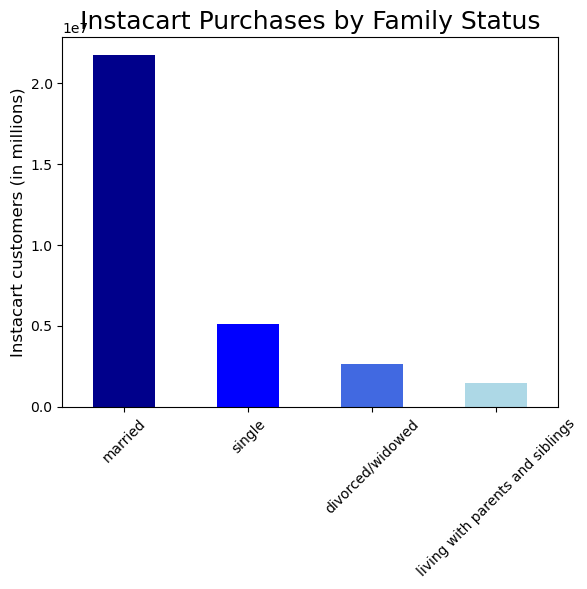

In [24]:
# Create a bar chart to see if there are differences of purchases depending on family status

bar_family_status= df_2['family_status'].value_counts(dropna = True).plot.bar(color =  ['darkblue', 'blue', 'royalblue', 'lightblue'])

plt.title("Instacart Purchases by Family Status", fontsize = '18')
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [25]:
# Export the bar chart

bar_family_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_family_status.png'), bbox_inches='tight')

In [26]:
# Create a new column 'dependant_status'

df_2.loc[(df_2['number_dependants'] == 0), 'dependant_status'] = 'no dependants'
df_2.loc[(df_2['number_dependants'] > 0), 'dependant_status'] = 'has dependants'

In [27]:
# Check frequencies for 'dependant_status'

df_2['dependant_status'].value_counts(dropna = False)

has dependants    23224883
no dependants      7739681
Name: dependant_status, dtype: int64

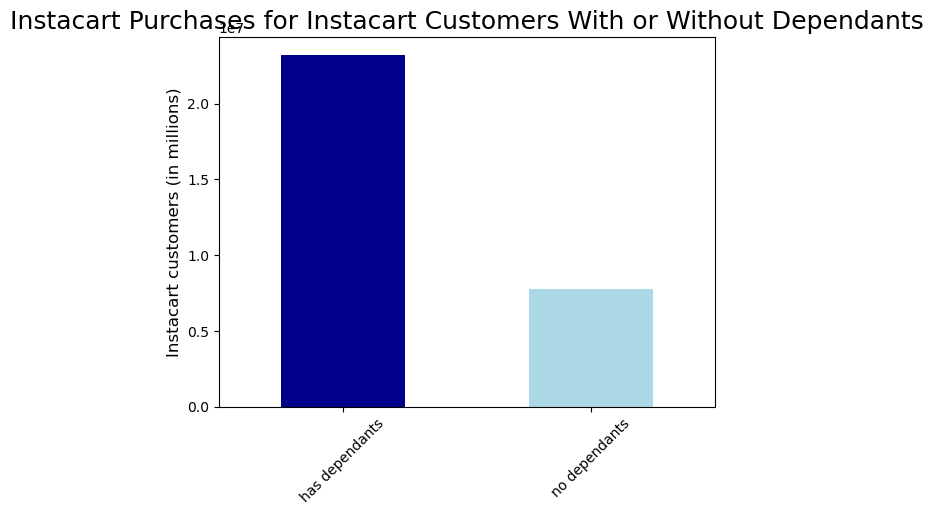

In [28]:
# Create a bar chart to compare the dependant status of customers

bar_dependant_status= df_2['dependant_status'].value_counts(dropna = True).plot.bar(color =  ['darkblue', 'lightblue'])

plt.title("Instacart Purchases for Instacart Customers With or Without Dependants", fontsize = '18')
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [29]:
# Export the bar chart

bar_dependant_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependant_status.png'), bbox_inches='tight')

In [30]:
# Compare family status with whether they have dependants or not

crossprofile = pd.crosstab(df_2['family_status'], df_2['number_dependants'], dropna = False)

In [31]:
# Check the output

crossprofile

number_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2645271,0,0,0
living with parents and siblings,0,508045,484658,488469
married,0,7211061,7248603,7284047
single,5094410,0,0,0


### According to the results only those customers who are married, or live with close family members have dependants.

## Creating Customer Profiles

### a) Profile by Family Status & Income 

In [32]:
# Create a profile for "single adult with high income"

df_2.loc[(df_2['family_status'] == 'single') & (df_2['income_flag'] == 'High'), 'profile_fam_stat_income'] = 'high-income single adult'


In [33]:
# Create a profile for "single adult with mid-income"

df_2.loc[(df_2['family_status'] == 'single') & (df_2['income_flag'] == 'Middle'), 'profile_fam_stat_income'] = 'mid-income single adult'

In [34]:
# Create a profile for "single adult with low income"

df_2.loc[(df_2['family_status'] == 'single') & (df_2['income_flag'] == 'Low'), 'profile_fam_stat_income'] = 'low-income single adult'

In [35]:
# Create a profile for "married adult with high income"

df_2.loc[(df_2['family_status'] == 'married') & (df_2['income_flag'] == 'High'), 'profile_fam_stat_income'] = 'high-income married adult'

In [36]:
# Create a profile for "married adult with mid-income"

df_2.loc[(df_2['family_status'] == 'married') & (df_2['income_flag'] == 'Middle'), 'profile_fam_stat_income'] = 'mid-income married adult'

In [37]:
# Create a profile for "married adult with low income"

df_2.loc[(df_2['family_status'] == 'married') & (df_2['income_flag'] == 'Low'), 'profile_fam_stat_income'] = 'low-income married adult'

In [38]:
# Creating a profile for "divorced/widowed adult with high income"

df_2.loc[(df_2['family_status'] == 'divorced/widowed') & (df_2['income_flag'] == 'High'), 'profile_fam_stat_income'] = 'high-income divored/widowed adult'

In [39]:
# Create a profile for "divorced/widowed adult with mid-income"

df_2.loc[(df_2['family_status'] == 'divorced/widowed') & (df_2['income_flag'] == 'Middle'), 'profile_fam_stat_income'] = 'mid-income divorced/widowed adult'

In [40]:
# Create a profile for "divorced/widowed adult with low income"

df_2.loc[(df_2['family_status'] == 'divorced/widowed') & (df_2['income_flag'] == 'Low'), 'profile_fam_stat_income'] = 'low-income divorced/widowed adult'

In [41]:
# Creating a profile for "cohabiting adult living with high income"

df_2.loc[(df_2['family_status'] == 'living with parents or siblings') & (df_2['income_flag'] == 'High'), 'profile_fam_stat_income'] = 'high-income living with family adult'

In [42]:
# Creating a profile for "cohabiting adult living with mid-income"

df_2.loc[(df_2['family_status'] == 'living with parents or siblings') & (df_2['income_flag'] == 'Middle'), 'profile_fam_stat_income'] = 'mid-income living with family adult'

In [43]:
# Creating a profile for "cohabiting adult living with low-income"

df_2.loc[(df_2['family_status'] == 'living with parents or siblings') & (df_2['income_flag'] == 'Low'), 'profile_fam_stat_income'] = 'low-income living with family adult'

In [44]:
# Check the frequencies for the 'profile_fam_stat_income' column

df_2['profile_fam_stat_income'].value_counts()

mid-income married adult             9256303
high-income married adult            6840076
low-income married adult             5647332
mid-income single adult              2206213
low-income single adult              1779765
high-income divored/widowed adult    1213074
high-income single adult             1108432
mid-income divorced/widowed adult    1080141
low-income divorced/widowed adult     352056
Name: profile_fam_stat_income, dtype: int64

In [45]:
# Check the size of the dataframe

df_2.shape

(30964564, 35)

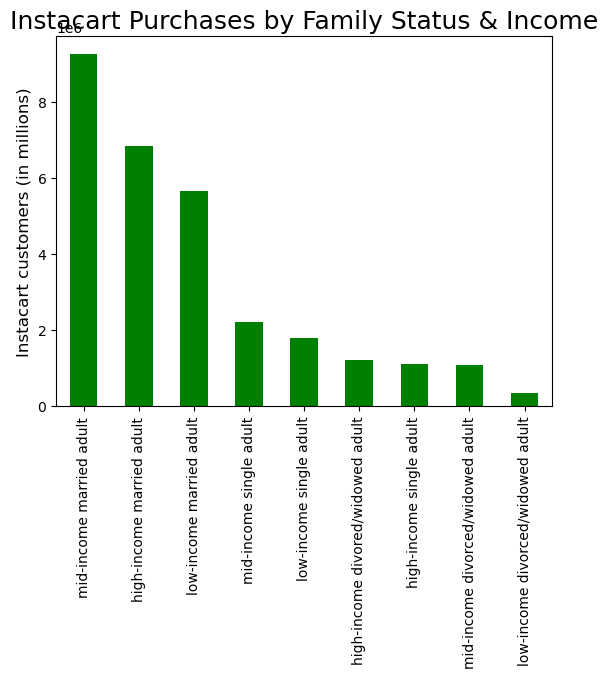

In [46]:
# Create a bar chart for the 'profile_fam_stat_income' column

bar_fam_stat_income = df_2['profile_fam_stat_income'].value_counts().plot.bar(color = ['green'])
plt.title("Instacart Purchases by Family Status & Income", fontsize = '18')
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.show()

In [47]:
# Export the bar chart

bar_fam_stat_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_status_income.png'), bbox_inches='tight')

### b) Profile by Number of Dependants

In [48]:
# Create a profile for "small families"

df_2.loc[(df_2['number_dependants'] == 1), 'profile_fam_size'] = 'small family'



In [49]:
# Create a profile for "medium families"

df_2.loc[(df_2['number_dependants'] == 2), 'profile_fam_size'] = 'medium family'



In [50]:
 # Create a profile for "big families"

df_2.loc[(df_2['number_dependants'] == 3), 'profile_fam_size'] = 'big family'

In [51]:
# Check frequencies for 'profile_fam_size'

df_2['profile_fam_size'].value_counts()

big family       7772516
medium family    7733261
small family     7719106
Name: profile_fam_size, dtype: int64

In [52]:
# Check the size of the dataframe

df_2.shape

(30964564, 36)

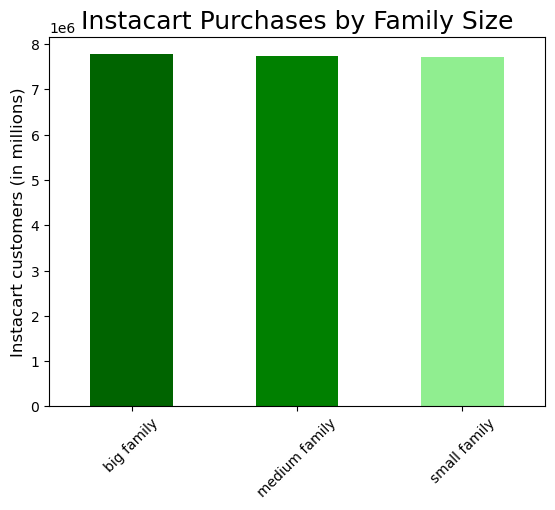

In [53]:
# Create a bar chart to see if there are differences of purchases depending on family size

bar_fam_size= df_2['profile_fam_size'].value_counts(dropna = True).plot.bar(color = ['darkgreen', 'green', 'lightgreen'])

plt.title("Instacart Purchases by Family Size", fontsize = '18')
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

In [54]:
# Export the bar chart

bar_fam_size.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_size.png'), bbox_inches='tight')

### There are no significant differences of purchases based on family size.

### c) Profile by Number of Dependants & Income

In [55]:
# Create a profile for "high-income family"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['income_flag'] == 'High'), 'profile_fam_income'] = 'high-income family'

In [56]:
# Create a profile for "families with mid income"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['income_flag'] == 'Middle'), 'profile_fam_income'] = 'mid-income family'


In [57]:
# Create a profile for "families with low income"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['income_flag'] == 'Low'), 'profile_fam_income'] = 'low-income family'



In [58]:
# Create profile for "high-income no dependants"

df_2.loc[(df_2['number_dependants'] == 0) & (df_2['income_flag'] == 'High'), 'profile_fam_income'] = 'high-income no dependants'

In [59]:
# Create profile for "mid-income no dependants"

df_2.loc[(df_2['number_dependants'] == 0) & (df_2['income_flag'] == 'Middle'), 'profile_fam_income'] = 'mid-income no dependants'

In [60]:
# Create profile for "low-income no dependants"

df_2.loc[(df_2['number_dependants'] == 0) & (df_2['income_flag'] == 'Low'), 'profile_fam_income'] = 'low-income no dependants'

In [61]:
# Check the frequencies for the 'profile_fam_income' column

df_2['profile_fam_income'].value_counts(dropna = False)

mid-income family            9977894
high-income family           6858277
low-income family            6388712
mid-income no dependants     3286354
high-income no dependants    2321506
low-income no dependants     2131821
Name: profile_fam_income, dtype: int64

In [62]:
# Check the size of the dataframe

df_2.shape

(30964564, 37)

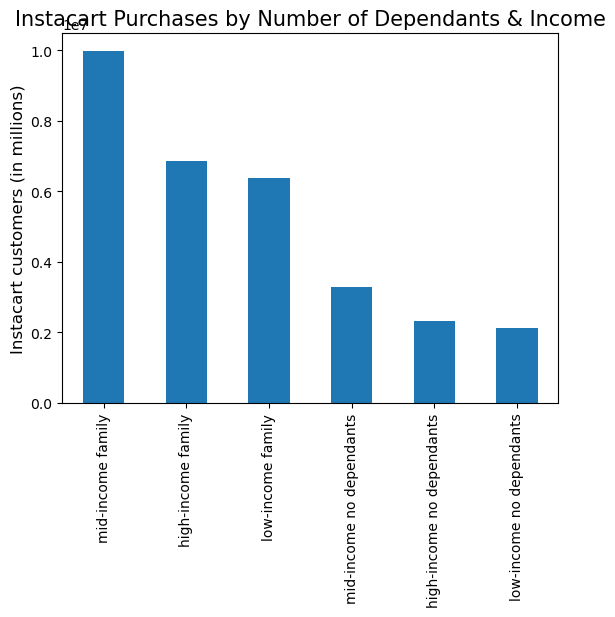

In [63]:
# Create a bar chart to see if there are differences of purchases depending on income & number of dependants

bar_fam_size_income= df_2['profile_fam_income'].value_counts().plot.bar()

plt.title("Instacart Purchases by Number of Dependants & Income", fontsize = 15)
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.show()

#### Most purchases are made by people with dependants. Mid-income families make up the majority of Instacart customers.

In [64]:
# Export the bar chart

bar_fam_size_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_size_income.png'), bbox_inches='tight')

### d) Profile by Age & Income

In [65]:
# Create a profile for "Senior with high income"

df_2.loc[(df_2['age_category'] == 'Senior') & (df_2['income_flag'] == 'High'), 'profile_age_income'] = 'high-income senior'

In [66]:
# Create a profile for "Senior with low income"

df_2.loc[(df_2['age_category'] == 'Senior') & (df_2['income_flag'] == 'Low'), 'profile_age_income'] = 'low-income senior'

In [67]:
# Create a profile for "Middle-aged with high income"

df_2.loc[(df_2['age_category'] == 'Middle age') & (df_2['income_flag'] == 'High'), 'profile_age_income'] = 'high-income middle aged'

In [68]:
# Create a profile for "Middle-aged with low income"

df_2.loc[(df_2['age_category'] == 'Middle age') & (df_2['income_flag'] == 'Low'), 'profile_age_income'] = 'low-income middle aged'

In [69]:
# Create a profile for "Youth with high income"

df_2.loc[(df_2['age_category'] == 'Youth') & (df_2['income_flag'] == 'High'), 'profile_age_income'] = 'high-income youth'

In [70]:
# Create a profile for "Youth with low income"

df_2.loc[(df_2['age_category'] == 'Youth') & (df_2['income_flag'] == 'Low'), 'profile_age_income'] = 'low-income youth'

In [71]:
# Check the frequencies for the 'profile_age_income' column

df_2['profile_age_income'].value_counts()

high-income middle aged    5355486
low-income youth           4275698
high-income senior         3727234
low-income middle aged     3120943
low-income senior          1123892
high-income youth            97063
Name: profile_age_income, dtype: int64

In [72]:
# Check the size of the dataframe

df_2.shape

(30964564, 38)

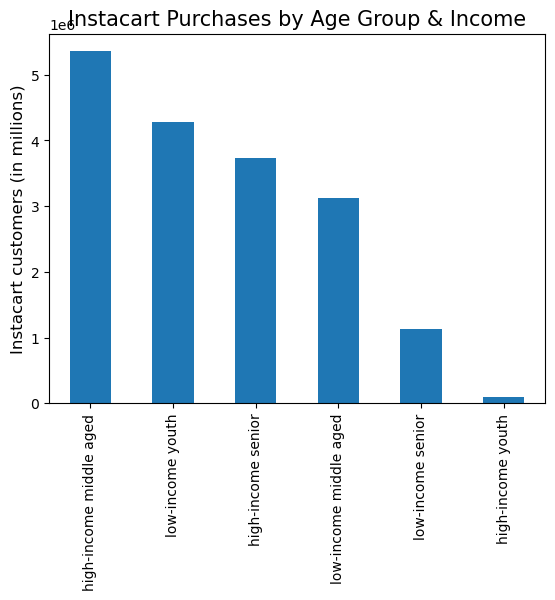

In [73]:
# Create a bar chart to see if there are differences of purchases depending on income & age

bar_age_income= df_2['profile_age_income'].value_counts().plot.bar()

plt.title("Instacart Purchases by Age Group & Income", fontsize = '15')
plt.ylabel('Instacart customers (in millions)', fontsize = 12)
plt.show()

#### Most purchases are made by middle aged people with high income, while the least purchases are made by young people with high-income.

In [74]:
# Export the bar chart

bar_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_income.png'), bbox_inches='tight')

### e) Profile by purchases from certain departments

In [75]:
# Create a profile for "family with baby"  (department = 18 = babies)

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['department_id'] == 18), 'profile_departments'] = 'family with baby'

In [76]:
# Create a profile for customers that eat meat

df_2.loc[df_2['department_id'] ==12, 'profile_departments'] = 'meat consumers'

In [77]:
# Create a profile for customers that drink alcohol

df_2.loc[df_2['department_id'] ==5, 'profile_departments'] = 'alcohol drinkers'

In [78]:
# Create a profile for "pet owners"

df_2.loc[df_2['department_id'] ==8, 'profile_departments'] = 'pet owners'

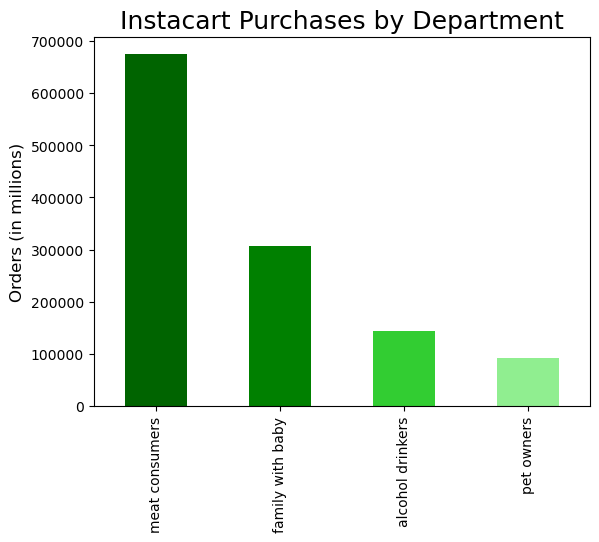

In [79]:
# Create a bar chart to see if there are differences of purchases by department

bar_departments= df_2['profile_departments'].value_counts().plot.bar(color = ['darkgreen', 'green', 'limegreen', 'lightgreen'])

plt.title("Instacart Purchases by Department", fontsize = '18')
plt.ylabel('Orders (in millions)', fontsize = 12)
plt.show()

In [80]:
# Export the bar chart

bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'), bbox_inches='tight')

### f) Order time of day

In [81]:
# Check the distribution of orders within 24 hours day

df_2['order_hour_of_day'].value_counts(dropna = False).sort_index()

0      208042
1      109621
2       65691
3       48796
4       50763
5       84418
6      281013
7      863213
8     1659110
9     2363611
10    2649744
11    2614880
12    2495795
13    2539276
14    2567903
15    2535966
16    2413681
17    1982345
18    1551184
19    1193878
20     930909
21     763111
22     607060
23     384554
Name: order_hour_of_day, dtype: int64

#### Most orders are placed between 9 am and 6 pm.

In [82]:
# Create a list for the new order_time_period column

result = []

for hour in df_2['order_hour_of_day']:
    if hour in [0, 1, 2, 3, 4, 17, 18, 19, 20, 21, 22, 23]:
        result.append('Night Owl')
    elif hour in [5, 6, 7, 8]:
        result.append('Early Bird')
    else:
        result.append('Regular')

In [83]:
# Check the results

result

['Early Bird',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Early Bird',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Early Bird',
 'Regular',
 'Regular',
 'Early Bird',
 'Early Bird',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Night Owl',
 'Early Bird',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regular',
 'Regula

In [84]:
# Create a new column 'order_time_period'

df_2['order_time_period'] = result

In [85]:
# Check the frequency of the new column

df_2['order_time_period'].value_counts(dropna = False)

Regular       20180856
Night Owl      7895954
Early Bird     2887754
Name: order_time_period, dtype: int64

In [86]:
# Check the size of the dataframe

df_2.shape

(30964564, 40)

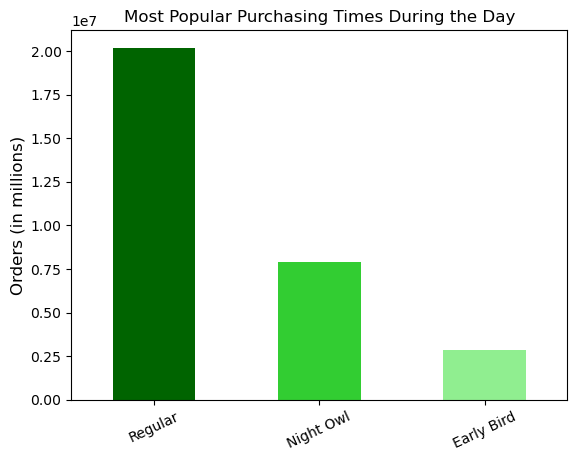

In [87]:
# Create a bar chart for the 'order_time_period' column

bar_order_time = df_2['order_time_period'].value_counts().plot.bar(color = ['darkgreen', 'limegreen', 'lightgreen'])
plt.title('Most Popular Purchasing Times During the Day')
plt.ylabel('Orders (in millions)', fontsize = 12)
plt.xticks(rotation=25)
plt.show()

#### Most orders are placed at regular times during the day. The least orders are placed in the early morning.

In [88]:
# Export the bar chart

bar_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_order_time.png'), bbox_inches='tight')

## Creating new customer profiles based on the most interesting findings from the previously created profiles

In [89]:
# Create a profile for "high-income family"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['income_flag'] == 'High'), 'customer_profile'] = 'high-income family'

In [90]:
# Create a profile for "mid-income family"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['income_flag'] == 'Middle'), 'customer_profile'] = 'mid-income family'

In [91]:
# Create a profile for "low-income family"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['income_flag'] == 'Low'), 'customer_profile'] = 'low-income family'

In [92]:
# Create a profile for "high-income single adult"

df_2.loc[(df_2['family_status'] == 'single') & (df_2['income_flag'] == 'High'), 'customer_profile'] = 'high-income single adult'

In [93]:
# Create a profile for "low-income single adult"

df_2.loc[(df_2['family_status'] == 'single') & (df_2['income_flag'] == 'Low'), 'customer_profile'] = 'low-income single adult'

In [94]:
# Create a profile for "high-income Senior"

df_2.loc[(df_2['age_category'] == 'Senior') & (df_2['income_flag'] == 'High'), 'customer_profile'] = 'high-income senior'

In [95]:
# Create a profile for "low-income Senior"

df_2.loc[(df_2['age_category'] == 'Senior') & (df_2['income_flag'] == 'Low'), 'customer_profile'] = 'low-income senior'

In [96]:
# Create a profile for "single adult that drinks alcohol"

df_2.loc[(df_2['family_status']  == 'single') & (df_2['department_id'] ==5), 'customer_profile'] = 'single adult alcohol drinker'

In [97]:
# Create a profile for "senior with pets"

df_2.loc[(df_2['age_category'] == 'Senior') & (df_2['department_id'] ==8), 'customer_profile'] = 'senior with pets'

In [98]:
# Create profile for "family with babies"

df_2.loc[(df_2['number_dependants'] > 0) & (df_2['department_id'] == 18), 'customer_profile'] = 'family with baby'

In [99]:
# Create a profile for middle age meat consumer

df_2.loc[(df_2['age_category'] == 'Middle age') & (df_2['department_id'] ==12), 'customer_profile'] = 'middle-aged meat consumer'

In [100]:
# label everyone else as "other"

df_2['customer_profile'] = df_2['customer_profile'].fillna('other')

In [101]:
# Check the frequencies for 'customer_profile'

df_2['customer_profile'].value_counts(dropna = False)

mid-income family               9723378
low-income family               5431133
high-income family              3911380
high-income senior              3675853
other                           3600241
low-income single adult         1760517
low-income senior               1113538
high-income single adult        1076804
middle-aged meat consumer        314573
family with baby                 307064
senior with pets                  25115
single adult alcohol drinker      24968
Name: customer_profile, dtype: int64

# 04. Visualizing the profiling variable

## Q6. Create an appropriate visualization to show the distribution of profiles.

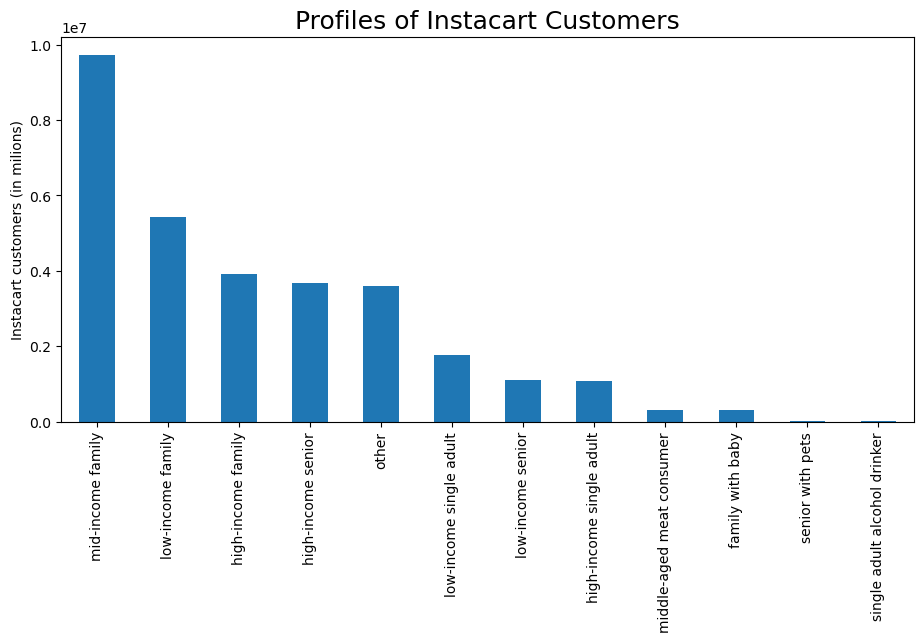

In [102]:
# Create a barchart for the customer profiles

bar_profiles = df_2['customer_profile'].value_counts().plot.bar(figsize = (11,5))
plt.ylabel ('Instacart customers (in milions)')
plt.title('Profiles of Instacart Customers', fontsize = '18')
plt.show()

#### Among the profiles families make up the biggest proportion of Instacart customers. The more specialized the profile is, the less number of customers can be found.

In [103]:
# Export the bar chart

bar_profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profiles.png'), bbox_inches='tight')

# 05. Aggregating summary statistics

## Q7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [104]:
# Compare the max, min and mean values

df_2.groupby('customer_profile').agg({'prices': ['max','min','mean'], 'days_since_prior_order':['mean', 'min','max']})

prices                 days_since_prior_order  \
                                max  min       mean                   mean   
customer_profile                                                             
family with baby               15.0  1.0   7.647681               9.734375   
high-income family             25.0  1.0   7.747456              10.828125   
high-income senior             25.0  1.0   7.961992              10.757812   
high-income single adult       25.0  1.0   7.745627              10.640625   
low-income family              25.0  1.0   7.389839              10.929688   
low-income senior              25.0  1.0   6.781717              11.054688   
low-income single adult        25.0  1.0   7.422520              10.914062   
mid-income family              25.0  1.0   7.867542              10.765625   
middle-aged meat consumer      25.0  8.0  16.306383              11.179688   
other                          25.0  1.0   7.830658              10.765625   
senior with pets               15.0  1.1   7.919677              11.242188   
single adult alcohol drinker   15.0  1.0   7.969088               9.687500   

                                         
                              min   max  
customer_profile                         
family with baby              0.0  30.0  
high-income family            0.0  30.0  
high-income senior            0.0  30.0  
high-income single adult      0.0  30.0  
low-income family             0.0  30.0  
low-income senior             0.0  30.0  
low-income single adult       0.0  30.0  
mid-income family             0.0  30.0  
middle-aged meat consumer     0.0  30.0  
other                         0.0  30.0  
senior with pets              0.0  30.0  
single adult alcohol drinker  0.0  30.0

# 06. Comparing the profiling variable by region and department

## Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [105]:
# Compare customer profiles and regions

crosstab_profile_region = pd.crosstab(df_2['customer_profile'], df_2['region'], dropna = False)

In [106]:
# Check the output

crosstab_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
family with baby,71033,54687,104231,77113
high-income family,939735,696655,1275731,999259
high-income senior,853599,672336,1211722,938196
high-income single adult,270234,170730,356697,279143
low-income family,1277664,933483,1814987,1404999
low-income senior,252030,202664,365296,293548
low-income single adult,392060,315503,593769,459185
mid-income family,2256791,1734020,3257499,2475068
middle-aged meat consumer,74873,54724,104500,80476


In [107]:
# Create a department dictionary

dpt_map = dict(zip(df_departments['department_id'], df_departments['department']))

In [108]:
# Check the dictionary

dpt_map

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [109]:
# Create the 'department' column

df_2['department'] = df_2['department_id'].map(dpt_map)

In [110]:
# Check the frequencies for the 'department' column

df_2['department'].value_counts()

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

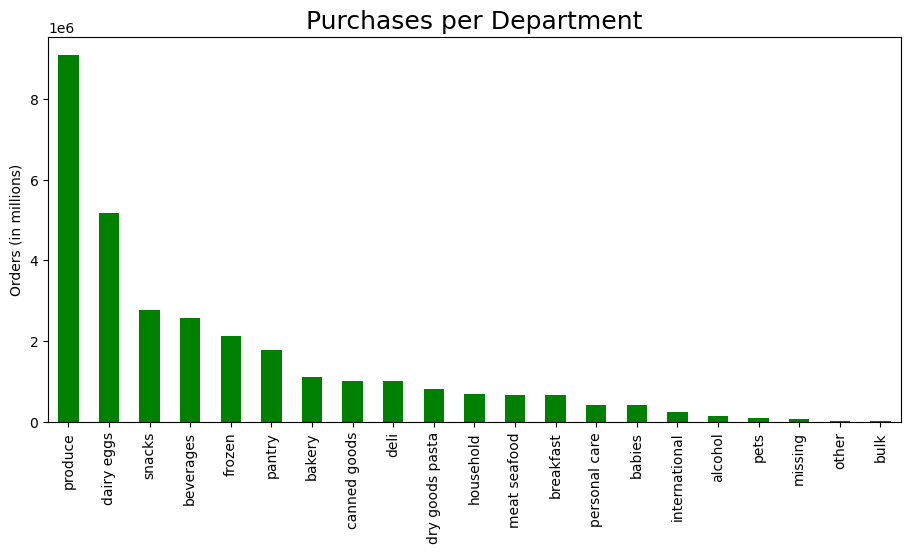

In [111]:
# Create a barchart to check the purchases of products from the individual departments

bar_departments = df_2['department'].value_counts().plot.bar(color = 'green', figsize = (11,5))
plt.ylabel ('Orders (in millions)')
plt.title('Purchases per Department', fontsize = '18')
plt.show()

#### The most popular departments among Instacart customers are produce, dairy eggs and snacks. Least popular departments are other and bulk.

In [112]:
# Export the bar chart

bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_departments.png'), bbox_inches='tight')

In [113]:
# Compare customer profiles and departments
crosstab_profile_department = pd.crosstab(df_2['customer_profile'], df_2['department'], dropna = False)

In [114]:
# Show all columns

pd.set_option('display.max_columns', None)

In [115]:
crosstab_profile_department

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
customer_profile,,,,,,,,,,,,,,,,,,,,,
family with baby,0,307064,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
high-income family,21073,0,151827,322207,85799,3791,140821,688090,130563,113225,285048,93540,34373,1646,8520,4559,241234,56186,13128,1200486,315264
high-income senior,17456,11707,138141,297202,76940,3741,126142,630334,121212,102633,260801,84435,31290,88804,7836,4139,219485,50984,0,1112625,289946
high-income single adult,0,15758,41596,88578,23195,1049,37990,188824,35604,30267,76173,25807,9114,584,2386,1282,65796,14745,3792,328024,86240
low-income family,25705,0,191999,507136,130482,6682,165129,891925,177949,134132,369888,128543,42664,64958,11483,5992,303975,75896,16131,1546364,634100
low-income senior,5675,2583,35671,125790,30019,1526,27289,170160,34030,21635,71833,29312,7200,12531,2217,1249,56037,16077,0,287382,175322
low-income single adult,0,20277,62162,161078,41340,1995,54008,288678,59193,43017,116629,40692,14068,21142,3805,2148,98358,25170,4930,504117,197710
mid-income family,43666,0,364302,778062,206659,10904,338580,1699752,324780,277094,689222,220507,85597,128781,21154,11012,585782,135992,21850,3003190,776492
middle-aged meat consumer,0,0,0,0,0,0,0,0,0,0,0,0,0,314573,0,0,0,0,0,0,0


# 07. Visualizing the comparison

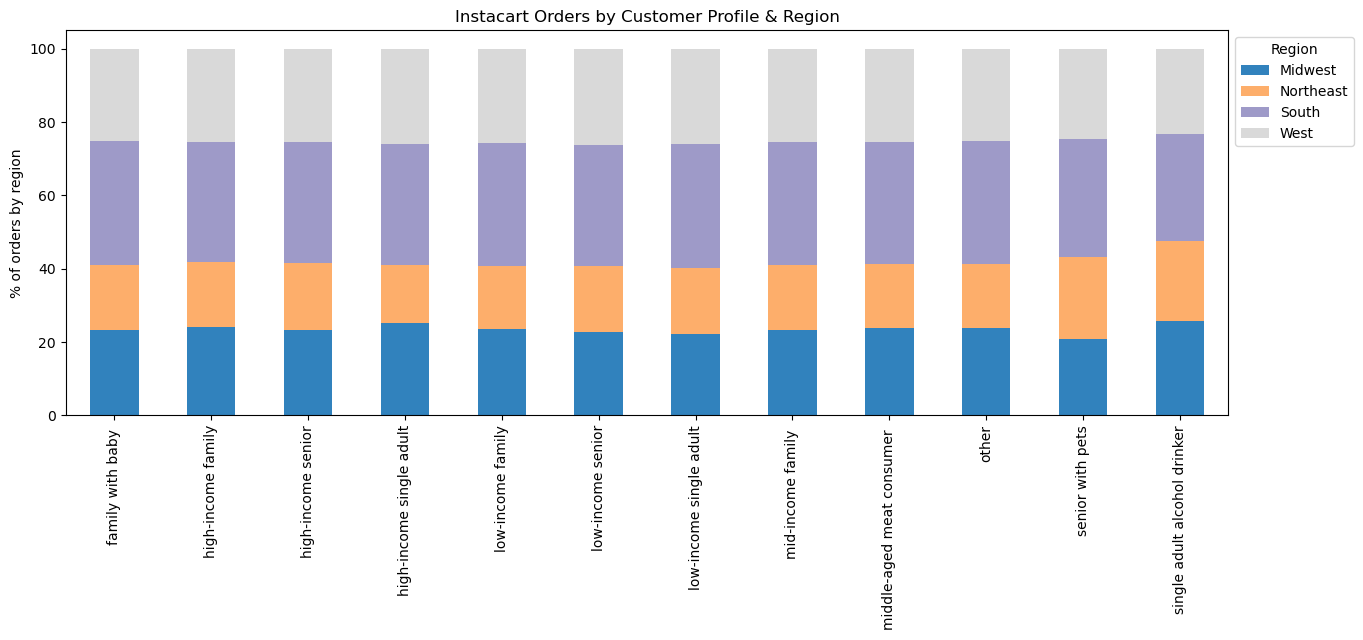

In [116]:
# Create a stacked bar graph to plot profile for regions

bar_profile_region = crosstab_profile_region.loc[:,['Midwest','Northeast','South','West']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=90, figsize=(15,5), colormap='tab20c').legend(title="Region", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by region")
plt.title ("Instacart Orders by Customer Profile & Region")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['family with baby ','high-income family','high-income senior','high-income single adult','low-income family','low-income senior','low-income single adult','mid-income family ','middle-aged meat consumer ','other','senior with pets','single adult alcohol drinker'])
plt.show()

#### In general there are no big differences among the customer profiles when analyzing the trends for the different regions. The highest number of customers are accounted for by the South while the lowest number of customers are in the Northeast. 

In [117]:
# Export the stacked bar chart

bar_profile_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_profiles_barchart.png'), bbox_inches = 'tight')

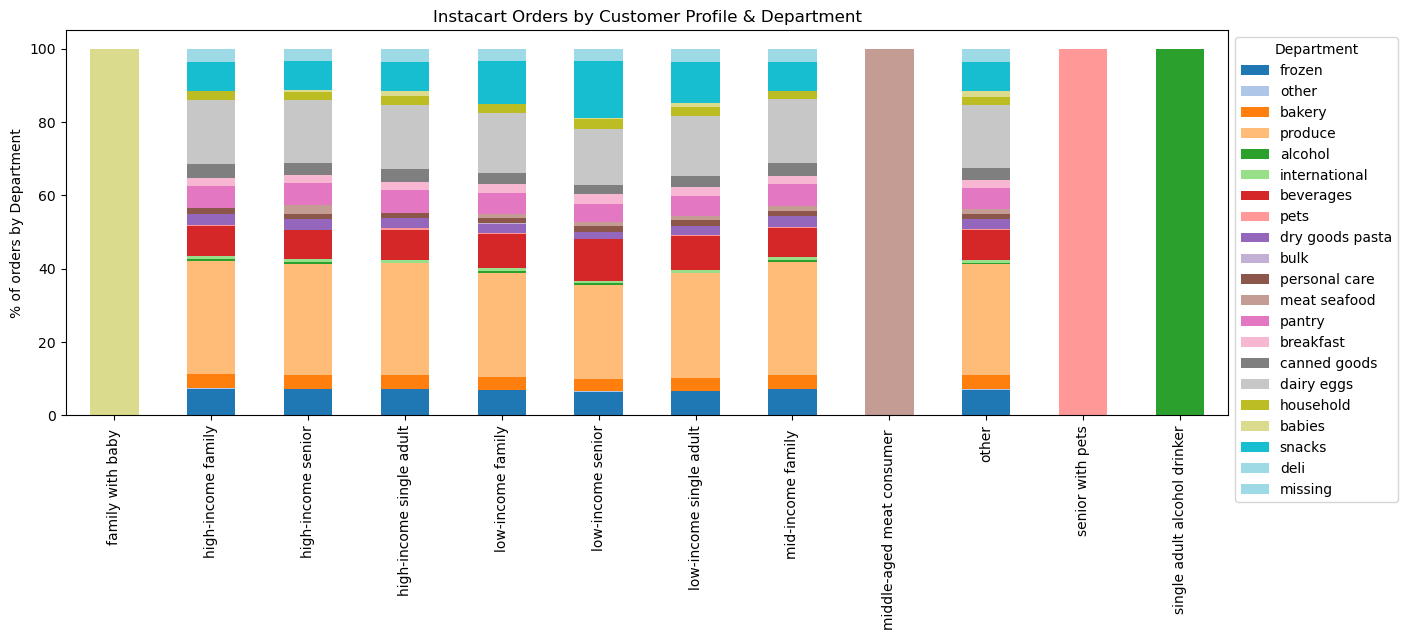

In [118]:
# Create a stacked bar graph to plot profile for department

bar_profile_department = crosstab_profile_department.loc[:,['frozen','other','bakery','produce','alcohol','international','beverages','pets','dry goods pasta','bulk','personal care','meat seafood','pantry','breakfast','canned goods','dairy eggs','household','babies','snacks','deli','missing']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=90, figsize=(15,5), colormap='tab20').legend(title="Department", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Department")
plt.title ("Instacart Orders by Customer Profile & Department")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['family with baby ','high-income family','high-income senior','high-income single adult','low-income family','low-income senior','low-income single adult','mid-income family ','middle-aged meat consumer ','other','senior with pets','single adult alcohol drinker'])
plt.show()


#### In general there are no big differences for the customer profiles when analyzing the trends for the different departments. The most popular department is produce.

In [119]:
# Export the stacked bar chart

bar_profile_department.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_profiles_barchart.png'), bbox_inches = 'tight')

# 08. Additional Visualizations for the final report

In [120]:
# Create a crosstab for region and loyalty flag

crosstab_region_loyalty = pd.crosstab(df_2['region'], df_2['loyalty_flag'], dropna = False)

In [121]:
# Check the crosstab

crosstab_region_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2373774,1136761,3750978
Northeast,1841785,842156,2780744
South,3405844,1593664,5311631
West,2662690,1231114,4033423


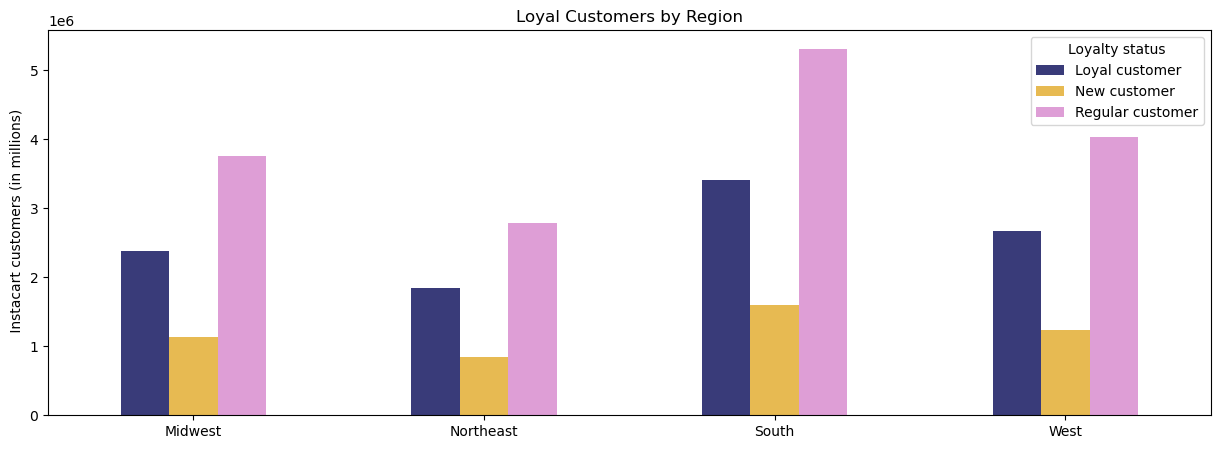

In [122]:
# Create a barchart from the crosstab

bar_loyalty_region = crosstab_region_loyalty.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='tab20b').legend(title="Loyalty status", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel(" Instacart customers (in millions)")
plt.title ("Loyal Customers by Region")
plt.show()

In [123]:
# Export the bar chart

bar_loyalty_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_region_barchart.png'), bbox_inches = 'tight')

In [124]:
# Create a crosstab to compare different orders by region and product price range

crosstab_regions_price_range = pd.crosstab(df_2['region'], df_2['price_range_loc'], dropna = False)

In [125]:
# Check the crosstab

crosstab_regions_price_range

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
Midwest,93280,2267085,4901148
Northeast,69732,1712360,3682593
South,132661,3217500,6960978
West,102280,2477895,5347052


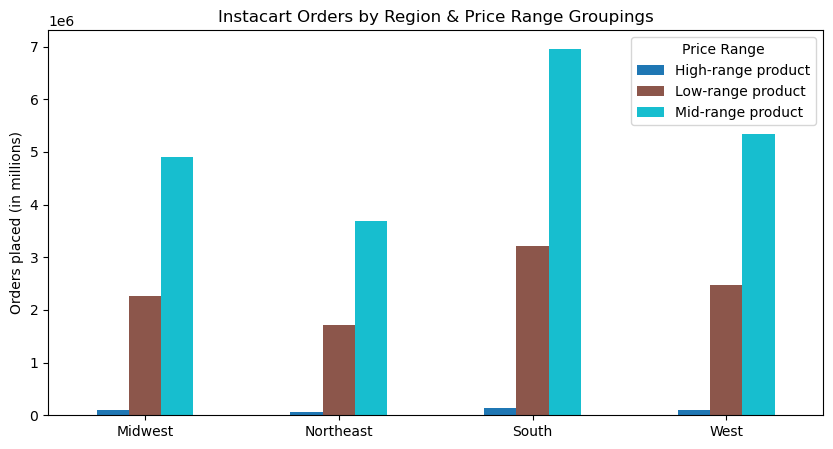

In [126]:
# Create a bar chart

bar_region_price_range = crosstab_regions_price_range.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(10,5), colormap='tab10').legend(title="Price Range", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("Orders placed (in millions)")
plt.title ("Instacart Orders by Region & Price Range Groupings")
plt.show()

In [127]:
# Export the bar chart

bar_region_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','region_price_range_barchart.png'), bbox_inches = 'tight')

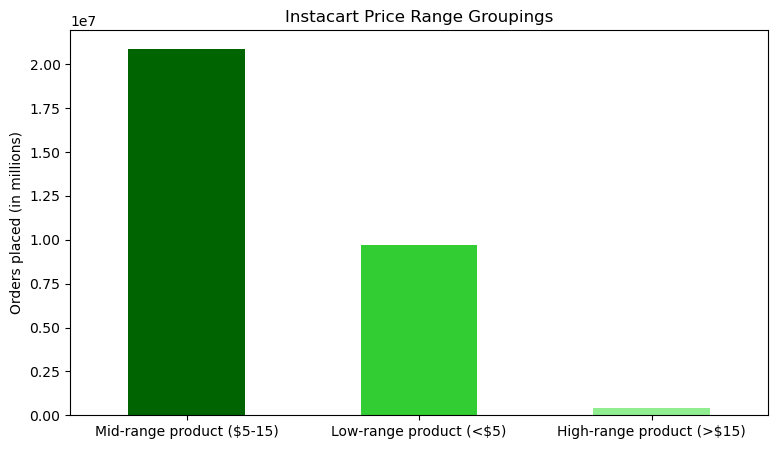

In [128]:
# Create a barchart for the price-range groupings

bar_price_range = df_2['price_range_loc'].value_counts().plot.bar(rot=0, figsize=(9,5),color = ['darkgreen', 'limegreen', 'lightgreen'])
plt.ylabel ('Orders placed (in millions)')
plt.xticks([0,1,2],['Mid-range product ($5-15)','Low-range product (<$5)','High-range product (>$15)'])
plt.title ("Instacart Price Range Groupings")
plt.show()

In [129]:
# Export the bar chart

bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','price_range_barchart.png'), bbox_inches = 'tight')

In [130]:
# Create a crosstab for 'department' and 'price_range_loc'

crosstab_dep_price_range = pd.crosstab(df_2['department'], df_2['price_range_loc'], dropna = False)

In [131]:
crosstab_dep_price_range 

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,33046,111581
babies,0,121484,288908
bakery,0,274986,845842
beverages,0,814697,1757204
breakfast,0,209185,461665
bulk,0,1181,32270
canned goods,0,281711,730363
dairy eggs,4877,1370908,3801397
deli,0,299220,704614


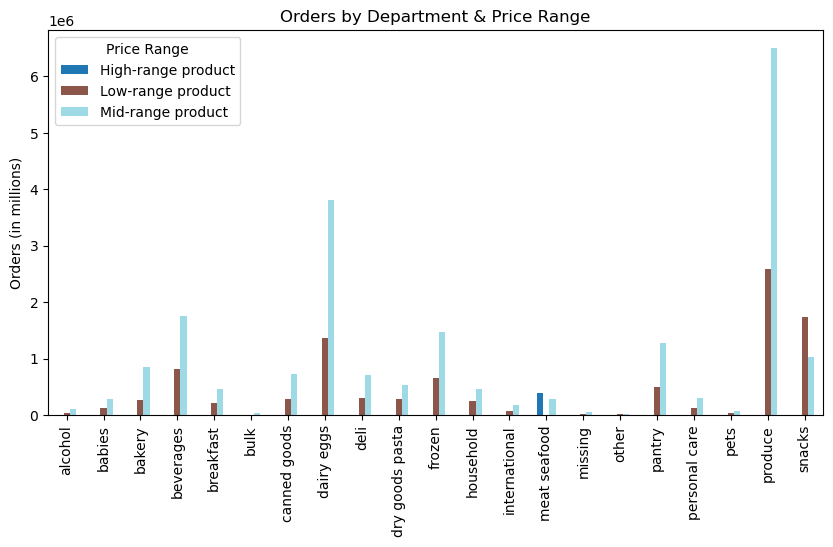

In [132]:
# Create a chart for the crosstab

bar_department_price_range = crosstab_dep_price_range.plot.bar(rot=90, figsize=(10,5), colormap='tab20').legend(title="Price Range")
plt.xlabel("")
plt.ylabel("Orders (in millions)")
plt.title ("Orders by Department & Price Range")
plt.show()


In [133]:
# Export the bar chart

bar_department_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_price_range_barchart.png'), bbox_inches = 'tight')

In [134]:
# Create a crosstab for 'department' and 'loyalty' flag

crosstab_dep_loyalty = pd.crosstab(df_2['department'], df_2['loyalty_flag'], dropna = False)

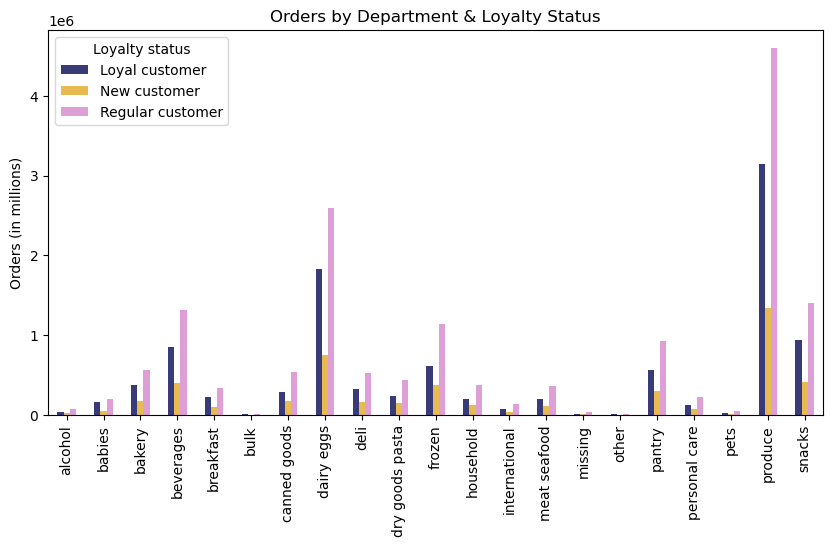

In [135]:
# Create a barchart for the crosstab

bar_department_loyalty = crosstab_dep_loyalty.plot.bar(rot=90, figsize=(10,5), colormap='tab20b').legend(title="Loyalty status")
plt.xlabel("")
plt.ylabel("Orders (in millions)")
plt.title ("Orders by Department & Loyalty Status")
plt.show()

In [136]:
# Export the bar chart

bar_department_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','department_loyalty_barchart.png'), bbox_inches = 'tight')

In [137]:
# Create a crosstab for order frequency and loyalty status 

crosstab_order_frequency_loyalty = pd.crosstab(df_2['days_since_prior_order'], df_2['loyalty_flag'], dropna = False)

In [138]:
crosstab_order_frequency_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061
8.0,643383,185317,1065114


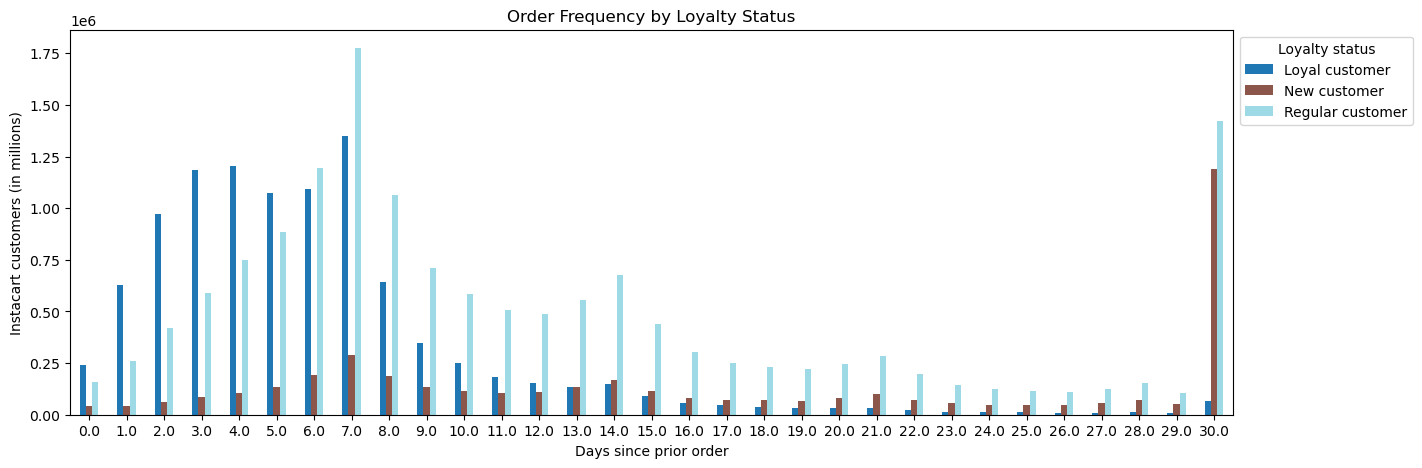

In [139]:
# Create a barchart from the crosstab

bar_frequency_loyalty = crosstab_order_frequency_loyalty.iloc[:,[0,1,2]].plot.bar(rot=0, figsize=(15,5), colormap='tab20').legend(title="Loyalty status", bbox_to_anchor=(1.0,1.0))
plt.xlabel("Days since prior order")
plt.ylabel("Instacart customers (in millions)")
plt.title ("Order Frequency by Loyalty Status")
plt.show()

In [140]:
# Export the bar chart

bar_frequency_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','frequency_loyalty_barchart.png'), bbox_inches = 'tight')

In [141]:
# Compare the mean, min, and max values for the order frequency by loyalty status

df_2.groupby('loyalty_flag').agg({'days_since_prior_order':['mean', 'min','max']}).round()

                                                          

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                      6.0  0.0  30.0
New customer                       18.0  0.0  30.0
Regular customer                   12.0  0.0  30.0

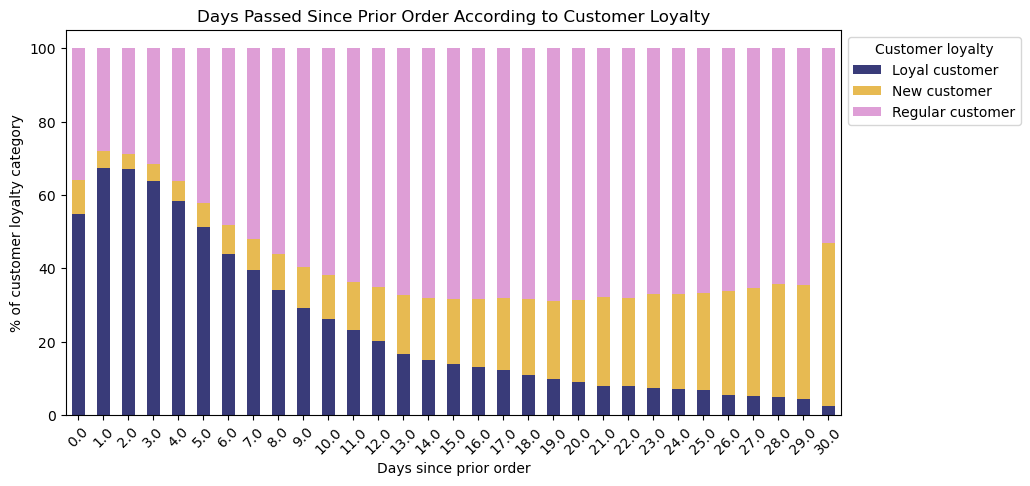

In [142]:
# Create a stacked chart of customer loyalty and days since prior order

bar_loyalty_days = crosstab_order_frequency_loyalty.loc[:,['Loyal customer','New customer','Regular customer']].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=45, figsize=(10,5), colormap = 'tab20b').legend(title="Customer loyalty", bbox_to_anchor=(1.0,1.0))
plt.xlabel("Days since prior order")
plt.ylabel("% of customer loyalty category")
plt.title ("Days Passed Since Prior Order According to Customer Loyalty")
plt.show()

In [143]:
# Export the stacked bar chart

bar_loyalty_days.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','loyalty_days_barchart.png'), bbox_inches = 'tight')

# 09. Exporting the final data set

## Q10. Tidy up your script, export your final data set, and save your notebook.

In [144]:
# Check the output of the final data set before exporting

df_2.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,region,exclusion_flag,income_flag,age_category,dependant_status,profile_fam_stat_income,profile_fam_size,profile_fam_income,profile_age_income,profile_departments,order_time_period,customer_profile,department
0,2539329,1,1,2,8,NaN,True,196,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Low,Youth,has dependants,low-income married adult,big family,low-income family,low-income youth,NaN,Early Bird,low-income family,beverages
1,2398795,1,2,3,7,15.0,False,196,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Low,Youth,has dependants,low-income married adult,big family,low-income family,low-income youth,NaN,Early Bird,low-income family,beverages
2,473747,1,3,3,12,21.0,False,196,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Low,Youth,has dependants,low-income married adult,big family,low-income family,low-income youth,NaN,Regular,low-income family,beverages
3,2254736,1,4,4,7,29.0,False,196,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Low,Youth,has dependants,low-income married adult,big family,low-income family,low-income youth,NaN,Early Bird,low-income family,beverages
4,431534,1,5,4,15,28.0,False,196,Soda,77,7,9.0,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,high-activity,Low,Youth,has dependants,low-income married adult,big family,low-income family,low-income youth,NaN,Regular,low-income family,beverages


In [145]:
# Check the size of the final data set before exporting

df_2.shape

(30964564, 42)

In [146]:
# Export the dataframe with the new variables created during this task

df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_profile.pkl'))